https://www.statsmodels.org/stable/multivariate.html

多变量统计是一种统计方法，当数据种包含不止一个结果变量时，同时进行观察和分析。多变量统计的应用是多变量分析。

多变量统计涉及了解每种不同形式的多变量分析的不同目的和背景，以及它们如何相互关联。多变量统计对特定问题的实际应用可能涉及几种类型的单变量和多变量分析，以便理解变量之间的关系及其与所研究问题的相关性。

# 主成分分析(Principal Component Analysis)

主成分分析是设法将原来众多具有一定相关性（比如P个指标），重新组合成一组新的互相无关的综合指标来代替原来的指标。

主成分分析，是考察多个变量间相关性一种多元统计方法，研究如何通过少数几个主成分来揭示多个变量间的内部结构，即从原始变量中导出少数几个主成分，使它们尽可能多地保留原始变量的信息，且彼此间互不相关.通常数学上的处理就是将原来P个指标作线性组合，作为新的综合指标。

In [5]:
import statsmodels

In [20]:
?statsmodels.multivariate.pca.PCA

In [11]:
import numpy as np
from statsmodels.multivariate.pca import PCA
x = np.random.randn(100)[:,None]
x = x + np.random.randn(100,100)
pc = PCA(x)

**注意，主成分是使用SVD计算的，因此从不构造相关矩阵，除非method =‘eig’。**

PCA使用数据的协方差矩阵

In [12]:
pc = PCA(x,standardize = False)

使用NIPALS将返回的因子数限制为1

In [17]:
pc = PCA(x, ncomp=2, method='nipals')
pc.factors.shape

(100, 2)

# 因子分析(Factor Analysis)

因子分析法是从研究变量内部相关的依赖关系出发，把一些具有错综复杂关系的变量归结为少数几个综合因子的一种多变量统计分析方法。它的基本思想是将观测变量进行分类，将相关性较高，即联系比较紧密的分在同一类中，而不同类变量之间的相关性则较低，那么每一类变量实际上就代表了一个基本结构，即公共因子（隐性变量, latent variable, latent factor）。对于所研究的问题就是试图用最少个数的不可测的所谓公共因子的线性函数与特殊因子之和来描述原来观测的每一分量。

因子分析的方法有两类。一类是探索性因子分析法，另一类是验证性因子分析。探索性因子分析不事先假定因子与测度项之间的关系，而让数据“自己说话”。主成分分析和共因子分析是其中的典型方法。验证性因子分析假定因子与测度项的关系是部分知道的，即哪个测度项对应于哪个因子，虽然我们尚且不知道具体的系数。

In [21]:
?statsmodels.multivariate.factor.Factor

## 因子旋转(Factor Rotation)

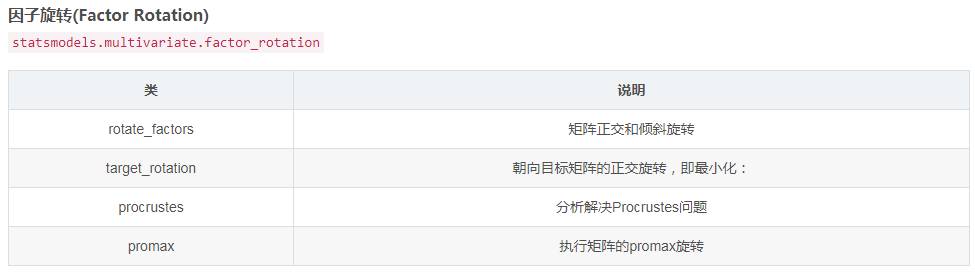

In [24]:
from statsmodels.multivariate.factor_rotation import rotate_factors
A = np.random.randn(8,2)
L, T = rotate_factors(A,'varimax')
np.allclose(L,A.dot(T))
L, T = rotate_factors(A,'orthomax',0.5)
np.allclose(L,A.dot(T))
L, T = rotate_factors(A,'quartimin',0.5)
np.allclose(L,A.dot(np.linalg.inv(T.T)))

True

# 典型相关(Canonical Correlation)

典型相关分析（canonical correlation analysis），是对互协方差矩阵的一种理解，是利用综合变量对之间的相关关系来反映两组指标之间的整体相关性的多元统计分析方法。它的基本原理是：为了从总体上把握两组指标之间的相关关系，分别在两组变量中提取有代表性的两个综合变量U1和V1（分别为两个变量组中各变量的线性组合），利用这两个综合变量之间的相关关系来反映两组指标之间的整体相关性。

In [ ]:
CanCorr(endog, exog,...) # 使用单因素分解的典型相关分析

# 多元方差分析(MANOVA)

在统计学中，多元方差分析（MANOVA）是一种比较多变量样本均值的程序 。作为一个多变量过程，它在有两个或多个因变量时使用，并且通常后面是分别涉及各个因变量的显着性检验。

MANOVA是单变量方差分析（ANOVA）的推广形式，尽管与单变量ANOVA不同，它使用结果变量之间的协方差来检验平均差异的统计显着性。其中，在单变量方差分析中出现平方和的情况下，在多变量方差分析中出现某些正定矩阵。对角线条目是出现在单变量ANOVA中的相同种类的平方和，非对角线条目则是相应的乘积和。在关于误差分布的正态假设下，由于误差导致的平方和对应部分服从Wishart分布。

# 多元线性模型(MultivariateOLS)

_MultivariateOLS是一个功能有限的模型类。目前它支持多变量假设检验，并用作MANOVA的后端